# 성별, 웃음여부  동시에 판단하는 모델

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34


# tfds 로 데이터셋 사용하기

In [2]:
import tensorflow_datasets as tfds

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'dart',
 'davis',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k

In [ ]:
# celeb_a = tfds.load('celeb_a')
# 다운 너무 오래 걸려서 작은 데이터셋으로 하자.

Dl Completed...: |          | 0/0 [00:00<?, ? url/s]

Dl Size...: |          | 0/0 [00:00<?, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/162770 [00:00<?, ? examples/s]

In [4]:
celeba_small = np.load('/home/aiffel/flip_cv_nlp/celeba_small.npz')
x = celeba_small['train_images'][3]
y = celeba_small['train_labels'][3]


In [6]:
x.shape, y.shape

((72, 59, 3), (2,))

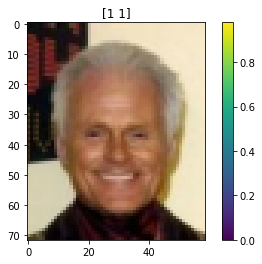

In [11]:
# x를 plt를 이용하여 출력하는 코드를 작성해보세요
plt.imshow(x)
plt.title(y)
plt.colorbar()
plt.show()

In [15]:
# dtype을 이용하여 이미지의 np array type을 확인해보세요.
# type(x)
train_images = celeba_small['train_images']
train_labels = celeba_small['train_labels']

test_images = celeba_small['test_images']
test_labels = celeba_small['test_labels']



In [16]:
train_images[train_images !=0][:10]

array([0.02352941, 0.04313725, 0.05490196, 0.01960784, 0.03921569,
       0.05490196, 0.01977401, 0.03921569, 0.05114656, 0.02352941])

In [17]:
train_images.dtype

dtype('float64')

# step 2  전처리

In [25]:
train_images.shape,train_labels.shape,  test_images.shape,test_labels.shape


((2000, 72, 59, 3), (2000, 2), (200, 72, 59, 3), (200, 2))

In [27]:
train_images.dtype, train_labels.dtype, test_images.dtype , test_labels.dtype

(dtype('float64'), dtype('int8'), dtype('float64'), dtype('int8'))

In [33]:
# images/labels 이미지 데이터의 최소/최대값을 출력
train_images.min(), train_labels.min(), test_images.min() , test_labels.min()

(0.0, 0, 0.0, 0)

In [31]:
train_images.max(), train_labels.max(), test_images.max() , test_labels.max()

(1.0, 1, 1.0, 1)

In [37]:
# (배치, 2)의 labels shape을 (배치, 1)의 shape의 2개의 array로 분리하는 코드를 추가하세요.
from keras.utils import to_categorical

In [49]:
train_male_labels, train_smile_labels = np.split(train_labels, 2, axis=1)
print(train_male_labels.shape,train_smile_labels.shape)

test_male_labels, test_smile_labels = np.split(test_labels, 2, axis=1)
print(test_male_labels.shape,test_smile_labels.shape)


(2000, 1) (2000, 1)
(200, 1) (200, 1)


In [50]:
train_male_labels[0],train_smile_label[0], train_labels[0]

(array([0], dtype=int8), array([0], dtype=int8), array([0, 0], dtype=int8))

In [51]:
train_male_labels = to_categorical(train_male_labels)
train_smile_labels= to_categorical(train_smile_labels)
test_male_labels = to_categorical(test_male_labels)
test_smile_labels = to_categorical(test_smile_labels)

In [52]:
train_male_labels.shape, train_smile_labels.shape

((2000, 2), (2000, 2))

In [53]:
test_male_labels.shape, test_smile_labels.shape

((200, 2), (200, 2))

### # (배치, 2), (배치, 2)의 labels를 (배치, 4)로 합치는 코드를 작성하세요.

(배치, 남성여부, 웃음여부) => (배치, 남성여부), 

(배치, 웃음여부) => (배치, 여자여부, 남자여부), 

(배치, 안웃음여부, 웃음여부) => (배치, 여자여부, 남자여부, 안웃음여부, 웃음여부)


In [56]:
test_labels2 = np.concatenate((test_male_labels,test_smile_labels),axis=1)
train_labels2 = np.concatenate((train_male_labels,train_smile_labels),axis=1)
test_labels2.shape, train_labels2.shape

((200, 4), (2000, 4))

In [61]:
# (배치, 세로, 가로, 3)인 train_images에서 (5, 세로, 가로, 3)을 획득하는 코드를 작성하세요.
train_images[:5].shape

(5, 72, 59, 3)

In [71]:
# transpose는 tensor의 axis를 섞는 기능을 합니다.
# 해당 기능을 이용해서 (세로, 가로 * 5, 3)을 작성하는 코드를 작성해보세요.
train_images[:5].transpose(1,0,2,3).reshape(72,-1,3).shape ## 뭔 말일까

(72, 295, 3)

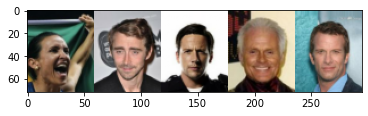

In [73]:
# smile, male label을 5개 출력하는 코드를 작성해보세요.
plt.imshow(train_images[:5].transpose(1,0,2,3).reshape(72,-1,3))

In [74]:
for male, smile in zip(train_male_labels[:5], train_smile_labels[:5]):
    print(male, smile)

[1. 0.] [1. 0.]
[0. 1.] [0. 1.]
[0. 1.] [1. 0.]
[0. 1.] [0. 1.]
[0. 1.] [0. 1.]


In [116]:
# input (배치, 72, 59, 3), output (배치, 2)을 처리할 수 있는 모양의 모델 2개를 작성하세요.
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input, Dense, Flatten

def simple_model():
    inputs = Input((72, 59, 3))
    
    x = Conv2D(32, 3, activation='relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation = 'relu')(x)
    ##
    outputs = Dense(2, activation = 'softmax')(x)
    
    model = Model(inputs, outputs)
    
    return model

    
    

In [117]:
gender_model = simple_model()
smile_model = simple_model()

In [118]:
gender_model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 72, 59, 3)]       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 70, 57, 32)        896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 35, 28, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 33, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 13, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 7, 5, 64)          0  

In [119]:
smile_model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 72, 59, 3)]       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 70, 57, 32)        896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 35, 28, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 33, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 13, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 14, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 7, 5, 64)          0  

In [120]:
gender_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
smile_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [121]:
gender_model.get_weights()[0][0][0][0]

array([-0.10309513, -0.12499297,  0.08708832, -0.11350521,  0.05612738,
        0.06948453,  0.06013852,  0.034072  ,  0.09208693, -0.07214318,
        0.10900889,  0.11183414, -0.00924554,  0.08847237, -0.1205207 ,
       -0.00478283,  0.09173939,  0.10436809,  0.12098004, -0.02264712,
        0.12203272,  0.01296163, -0.0372818 , -0.05833343,  0.13125588,
       -0.08342528, -0.0640012 , -0.10135423,  0.00445466, -0.03081392,
       -0.11860623, -0.07634948], dtype=float32)

In [122]:
smile_model.get_weights()[0][0][0][0]

array([-0.02041607, -0.10417267, -0.012798  , -0.07794444,  0.09434792,
       -0.05218952,  0.1315052 , -0.02076904,  0.01149173,  0.03597745,
        0.00570834,  0.06217675, -0.10285022, -0.04379687,  0.07939388,
       -0.01008363, -0.09330682,  0.05881943, -0.10071236,  0.02867526,
       -0.12863423,  0.10017867, -0.05895428,  0.07641558,  0.07424527,
        0.09542404, -0.12209033, -0.13433047, -0.07684947, -0.10624509,
       -0.01175459, -0.06446114], dtype=float32)

In [123]:
gender_hist = gender_model.fit(train_images, train_male_labels, validation_data=(test_images, test_male_labels), epochs=15, verbose=1)

Epoch 1/15
63/63 [==============================] - 10s 151ms/step - loss: 0.6105 - accuracy: 0.6660 - val_loss: 0.5318 - val_accuracy: 0.7500
Epoch 2/15
63/63 [==============================] - 0s 5ms/step - loss: 0.4455 - accuracy: 0.7890 - val_loss: 0.4193 - val_accuracy: 0.8500
Epoch 3/15
63/63 [==============================] - 0s 5ms/step - loss: 0.3063 - accuracy: 0.8680 - val_loss: 0.3009 - val_accuracy: 0.9100
Epoch 4/15
63/63 [==============================] - 0s 5ms/step - loss: 0.2268 - accuracy: 0.9075 - val_loss: 0.2724 - val_accuracy: 0.9200
Epoch 5/15
63/63 [==============================] - 0s 6ms/step - loss: 0.1809 - accuracy: 0.9285 - val_loss: 0.2493 - val_accuracy: 0.9200
Epoch 6/15
63/63 [==============================] - 0s 5ms/step - loss: 0.1352 - accuracy: 0.9460 - val_loss: 0.3787 - val_accuracy: 0.8900
Epoch 7/15
63/63 [==============================] - 0s 5ms/step - loss: 0.1161 - accuracy: 0.9555 - val_loss: 0.2340 - val_accuracy: 0.9350
Epoch 8/15
63/63 

In [124]:
smile_hist = smile_model.fit(train_images, train_male_labels, validation_data=(test_images, test_male_labels), epochs=15, verbose=1)

Epoch 1/15
63/63 [==============================] - 0s 7ms/step - loss: 0.5743 - accuracy: 0.7055 - val_loss: 0.5219 - val_accuracy: 0.7600
Epoch 2/15
63/63 [==============================] - 0s 5ms/step - loss: 0.4347 - accuracy: 0.7910 - val_loss: 0.4532 - val_accuracy: 0.8350
Epoch 3/15
63/63 [==============================] - 0s 6ms/step - loss: 0.3113 - accuracy: 0.8745 - val_loss: 0.3360 - val_accuracy: 0.8900
Epoch 4/15
63/63 [==============================] - 0s 5ms/step - loss: 0.2164 - accuracy: 0.9105 - val_loss: 0.2593 - val_accuracy: 0.8950
Epoch 5/15
63/63 [==============================] - 0s 5ms/step - loss: 0.1795 - accuracy: 0.9285 - val_loss: 0.2567 - val_accuracy: 0.9050
Epoch 6/15
63/63 [==============================] - 0s 5ms/step - loss: 0.1282 - accuracy: 0.9500 - val_loss: 0.2479 - val_accuracy: 0.9250
Epoch 7/15
63/63 [==============================] - 0s 6ms/step - loss: 0.0975 - accuracy: 0.9675 - val_loss: 0.2051 - val_accuracy: 0.9300
Epoch 8/15
63/63 [==

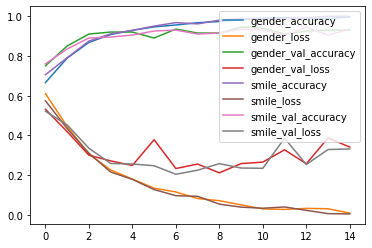

In [125]:
# hist의 accuracy plt의 plot을 이용하여 출력하는 코드를 작성하세요.

plt.plot(gender_hist.history['accuracy'], label='gender_accuracy')
plt.plot(gender_hist.history['loss'], label='gender_loss')
plt.plot(gender_hist.history['val_accuracy'], label='gender_val_accuracy')
plt.plot(gender_hist.history['val_loss'], label='gender_val_loss')

plt.plot(smile_hist.history['accuracy'], label='smile_accuracy')
plt.plot(smile_hist.history['loss'], label='smile_loss')
plt.plot(smile_hist.history['val_accuracy'], label='smile_val_accuracy')
plt.plot(smile_hist.history['val_loss'], label='smile_val_loss')

plt.legend(loc='upper right')
plt.show()







In [126]:
gender_res = gender_model.predict(test_images[1:2])
gender_res.shape

(1, 2)

In [127]:
smile_res = smile_model.predict(test_images[1:2])
smile_res.shape

(1, 2)

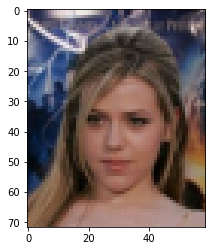

In [128]:
plt.imshow(test_images[1])
plt.show()

In [129]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input, Dense, Flatten, Concatenate

In [132]:
def multi_model():
    inputs = Input((72,59,3))
    
    layer = Conv2D(32, 3, activation = 'relu')(inputs)
    layer = MaxPool2D(2)(layer)
    layer = Conv2D(64, 3, activation = 'relu')(layer)
    layer = MaxPool2D(2)(layer)
    layer = Conv2D(64, 3, activation = 'relu')(layer)
    layer = MaxPool2D(2)(layer)
    
    layer = Flatten()(layer)
    
    latent_vector = Dense(54, activation ='relu')(layer)
    
    gender_outputs = Dense(2, activation='softmax')(latent_vector)
    smile_outputs = Dense(2, activation='softmax')(latent_vector)
    
    outputs = Concatenate(axis=1)([gender_outputs, smile_outputs])
    
    model = Model(inputs, outputs)
    
    return model
    

In [133]:
model2 = multi_model()
model2.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 72, 59, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 70, 57, 32)   896         input_17[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_47 (MaxPooling2D) (None, 35, 28, 32)   0           conv2d_48[0][0]                  
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 33, 26, 64)   18496       max_pooling2d_47[0][0]           
___________________________________________________________________________________________

In [134]:
model2.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [135]:
hist1 = model2.fit(train_images, train_labels2, validation_data=(test_images,test_labels2),epochs=15,verbose=1)

Epoch 1/15
63/63 [==============================] - 0s 7ms/step - loss: 2.6952 - accuracy: 0.5175 - val_loss: 2.6715 - val_accuracy: 0.6200
Epoch 2/15
63/63 [==============================] - 0s 5ms/step - loss: 2.5224 - accuracy: 0.7040 - val_loss: 2.5165 - val_accuracy: 0.6900
Epoch 3/15
63/63 [==============================] - 0s 5ms/step - loss: 2.3506 - accuracy: 0.7565 - val_loss: 2.2705 - val_accuracy: 0.7250
Epoch 4/15
63/63 [==============================] - 0s 5ms/step - loss: 2.1666 - accuracy: 0.7630 - val_loss: 2.1371 - val_accuracy: 0.7450
Epoch 5/15
63/63 [==============================] - 0s 5ms/step - loss: 1.9890 - accuracy: 0.7605 - val_loss: 2.0268 - val_accuracy: 0.7100
Epoch 6/15
63/63 [==============================] - 0s 5ms/step - loss: 1.8735 - accuracy: 0.7520 - val_loss: 2.1759 - val_accuracy: 0.6350
Epoch 7/15
63/63 [==============================] - 0s 5ms/step - loss: 1.8303 - accuracy: 0.7330 - val_loss: 2.0605 - val_accuracy: 0.6950
Epoch 8/15
63/63 [==

In [136]:
res = model2.predict(test_images[3:4])
print(len(res))
print(res[0].shape)

1
(4,)
